In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [3]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [4]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [5]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [6]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [7]:
driver_ids = driver_standings['driverId'].unique()

In [8]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20], dtype=int64)

In [9]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [10]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [11]:
race_names = races.set_index('raceId')['name'].to_dict()

In [12]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [13]:
driver_standings.reset_index(inplace=True)

In [14]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
210,33625,71503,1084,1,109.0,6,6,0,HAM,Austrian Grand Prix
209,33624,71502,1084,832,133.0,4,4,1,SAI,Austrian Grand Prix
208,33623,71501,1084,844,170.0,2,2,3,LEC,Austrian Grand Prix
217,33632,71510,1084,855,5.0,17,17,0,ZHO,Austrian Grand Prix


In [15]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [16]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
224,33639,71517,1084,807,0.0,21,21,0,HUL,Austrian Grand Prix
225,33640,71518,1084,815,151.0,3,3,1,PER,Austrian Grand Prix
226,33641,71519,1084,830,208.0,1,1,6,VER,Austrian Grand Prix
227,33642,71520,1084,842,16.0,13,13,0,GAS,Austrian Grand Prix


In [17]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [18]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
224,33639,71517,1084,807,0.0,21,21,0,HUL,Austrian Grand Prix,darkgreen
225,33640,71518,1084,815,151.0,3,3,1,PER,Austrian Grand Prix,darkblue
226,33641,71519,1084,830,208.0,1,1,6,VER,Austrian Grand Prix,darkblue
227,33642,71520,1084,842,16.0,13,13,0,GAS,Austrian Grand Prix,gray


In [19]:
grouped = driver_standings.groupby(['Team','raceId'])

In [20]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


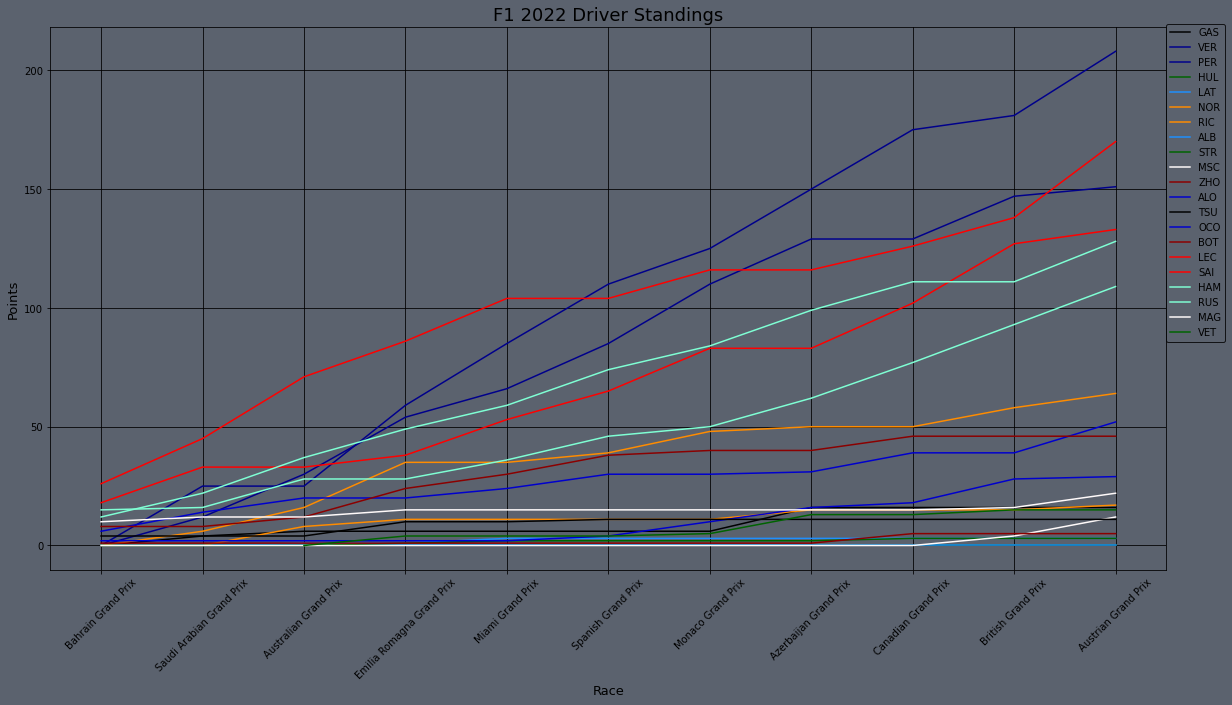

In [21]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)


plt.grid(color ='black')
plt.show()